In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Đọc file dữ liệu
df = pd.read_csv('Gold.csv')
df.head(5)

,Open,Close,High,Low,Date
0,1302.910,1316.500,1318.910,1302.855,1/2/2018
1,1318.375,1318.875,1321.300,1307.710,1/3/2018
2,1313.105,1327.875,1327.875,1306.050,1/4/2018
3,1322.050,1319.590,1323.505,1313.910,1/5/2018
4,1321.050,1320.980,1322.210,1315.105,1/8/2018


In [3]:
# Đưa về kiểu date và đánh index
df['Date'] = pd.to_datetime(df.Date)

# Sắp xếp lại index
df = df.sort_index(ascending=False)
df

,Open,Close,High,Low,Date
2114,2327.820,2327.820,2327.820,2327.820,2024-06-01
2113,2343.340,2327.820,2359.580,2320.630,2024-05-31
2112,2338.880,2343.380,2351.090,2323.030,2024-05-30
2111,2361.390,2339.110,2361.790,2335.070,2024-05-29
2110,2352.200,2361.310,2363.460,2340.420,2024-05-28
...,...,...,...,...,...
4,1321.050,1320.980,1322.210,1315.105,2018-01-08
3,1322.050,1319.590,1323.505,1313.910,2018-01-05
2,1313.105,1327.875,1327.875,1306.050,2018-01-04
1,1318.375,1318.875,1321.300,1307.710,2018-01-03


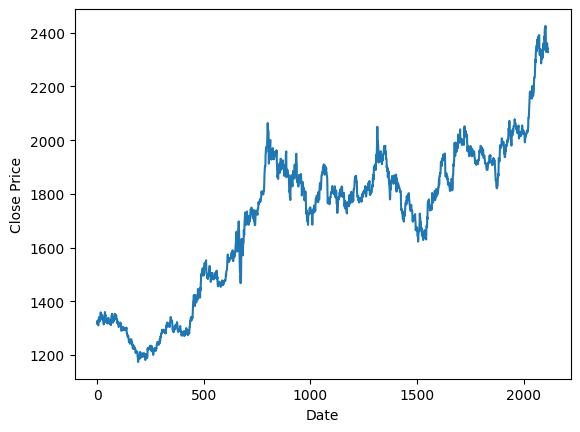

In [4]:
# Vẽ biểu đồ chuỗi thời gian
plt.plot(df.index, df["Close"])
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

In [5]:
df = df[['Close']]
df = df.reset_index(drop=True)
df.head(5)

,Close
0,2327.82
1,2327.82
2,2343.38
3,2339.11
4,2361.31


In [6]:
#Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [7]:
# Chia train test theo tỉ lệ 8:2
# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [8]:
train_data

array([[0.92194986],
       [0.92194986],
       [0.93438418],
       ...,
       [0.08041954],
       [0.08297673],
       [0.08265708]])

In [9]:
# Chuẩn bị dữ liệu cho x,y
def create_dataset(dataset, lags=1):
    X, Y = [], []
    for i in range(len(dataset)-lags-1):
        a = dataset[i:(i+lags), 0]
        X.append(a)
        Y.append(dataset[i + lags, 0])
    return np.array(X), np.array(Y)

In [10]:
#Thiết lập tham số cho model
lags = 30 
X_train, y_train = create_dataset(train_data, lags)
X_test, y_test = create_dataset(test_data, lags)

In [11]:
X_test

array([[0.08265708, 0.08992908, 0.09776046, ..., 0.07898112, 0.09020877,
        0.09292578],
       [0.08992908, 0.09776046, 0.09819998, ..., 0.09020877, 0.09292578,
        0.09292578],
       [0.09776046, 0.09819998, 0.1006373 , ..., 0.09292578, 0.09292578,
        0.09160723],
       ...,
       [0.11358306, 0.11358306, 0.11160923, ..., 0.10884427, 0.10978723,
        0.1173629 ],
       [0.11358306, 0.11160923, 0.11546099, ..., 0.10978723, 0.1173629 ,
        0.11625212],
       [0.11160923, 0.11546099, 0.12029567, ..., 0.1173629 , 0.11625212,
        0.12287284]])

In [12]:
#In thông tin kích thước của dữ liệu
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1661, 30) (1661,)
(392, 30) (392,)


In [13]:
model = SVR()

# Thiết lập phạm vi tốt cho các tham số
C_range = [0.1, 1, 10]  # Thay đổi tại đây
gamma_range = [0.01, 0.1, 1]  # Thay đổi tại đây
kernel_range = ['poly', 'linear', 'sigmoid'] #tạo ra 3 giá trị cho kernel

# Tạo lưới các giá trị tham số
param_grid = {'C': C_range, 'gamma': gamma_range, 'kernel': kernel_range}

# Thiết lập model với các tham số và số lượng folds cross-validation
model = GridSearchCV(model, param_grid, refit=True, verbose=3, cv=5, scoring='neg_mean_squared_error')

#trong đó:
#clf: model
#param_grid: tham số
#refit: lưu lại model tốt nhất
#verbose: hiển thị thông tin
#cv: số lượng folds cross-validation (chọn 5 folds cross-validation)
#scoring: đánh giá model bằng MSE

#8. Huấn luyện model
model.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END ...C=0.1, gamma=0.01, kernel=poly;, score=-0.037 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.01, kernel=poly;, score=-0.006 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.01, kernel=poly;, score=-0.002 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.01, kernel=poly;, score=-0.004 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.01, kernel=poly;, score=-0.071 total time=   0.0s
[CV 1/5] END .C=0.1, gamma=0.01, kernel=linear;, score=-0.001 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=0.01, kernel=linear;, score=-0.001 total time=   0.0s
[CV 3/5] END .C=0.1, gamma=0.01, kernel=linear;, score=-0.001 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=0.01, kernel=linear;, score=-0.002 total time=   0.0s
[CV 5/5] END .C=0.1, gamma=0.01, kernel=linear;, score=-0.003 total time=   0.0s
[CV 1/5] END C=0.1, gamma=0.01, kernel=sigmoid;, score=-0.009 total time=   0.0s
[CV 2/5] END C=0.1, gamma=0.01, kernel=sigmoid;

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['poly', 'linear', 'sigmoid']},
             scoring='neg_mean_squared_error', verbose=3)

In [14]:
model.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'sigmoid'}

In [15]:
#Dự báo dự liệu dựa trên tập test
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred.reshape(-1,1)).flatten()

In [16]:
y_pred

array([1249.24681743, 1249.94108378, 1250.08601128, 1251.164413  ,
       1251.81507925, 1251.63862468, 1251.70092984, 1251.92200892,
       1252.314381  , 1253.19940646, 1253.58364961, 1254.37331865,
       1254.58159154, 1255.19437461, 1255.86164921, 1256.1872719 ,
       1257.22695628, 1258.81246636, 1260.52546685, 1261.38508331,
       1262.28395219, 1263.08477761, 1264.51361826, 1265.63354216,
       1266.57473602, 1267.39790133, 1268.25813263, 1268.76736843,
       1270.00497468, 1270.34830416, 1270.01134516, 1269.8722049 ,
       1270.05699522, 1268.7097634 , 1267.43940437, 1266.78405012,
       1266.16849749, 1266.10107949, 1266.08621216, 1266.05592504,
       1267.22445561, 1268.76139901, 1270.7335668 , 1272.17867584,
       1273.62351231, 1275.07029333, 1275.79260928, 1277.31530738,
       1278.84550802, 1279.80515426, 1280.46393568, 1281.38963693,
       1281.34468979, 1280.90890996, 1281.06765628, 1281.09934509,
       1281.34954498, 1281.69914203, 1281.27505708, 1280.68383

In [17]:
# 10. Đánh giá độ chính xác thuật toán bằng MAPE, MSE và RMSE

#MAPE
test_mape = mean_absolute_percentage_error(y_pred, y_test)
#MSE
test_mse = mean_squared_error(y_pred, y_test)
#RMSE
test_rmse = np.sqrt(test_mse)

print('Testing MAPE:', test_mape)
print('Testing MSE:', test_mse)
print('Testing RMSE:', test_rmse)

Testing MAPE: 0.9999347729082259
Testing MSE: 1547790.9225976237
Testing RMSE: 1244.1024566319381


In [18]:
#Dự báo 30 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
lags=30
i=0
while(i<30):
    if(len(temp_input)>30):
        x_input=np.array(temp_input[-lags:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat)  # Append the scalar value directly
        temp_input=temp_input[1:]
        lst_output.append(yhat)  # Append the scalar value directly
        i=i+1
    else:
        x_input = x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print(yhat)
        temp_input.append(yhat)
        print(len(temp_input))
        lst_output.append(yhat)
        i=i+1


0 day input [0.12029567 0.1333613  0.12896614 0.12497053 0.12619718 0.13943862
 0.13655779 0.13153132 0.12986515 0.14205174 0.14205174 0.13855559
 0.14734592 0.1333613  0.12775147 0.12584957 0.12584957 0.12033563
 0.13086405 0.13152332 0.13320148 0.12896614 0.12119469 0.10884427
 0.10978723 0.1173629  0.11625212 0.12287284 0.11568075 0.11378284]
0 day output 0.10073014956977469
1 day input [0.1333613  0.12896614 0.12497053 0.12619718 0.13943862 0.13655779
 0.13153132 0.12986515 0.14205174 0.14205174 0.13855559 0.14734592
 0.1333613  0.12775147 0.12584957 0.12584957 0.12033563 0.13086405
 0.13152332 0.13320148 0.12896614 0.12119469 0.10884427 0.10978723
 0.1173629  0.11625212 0.12287284 0.11568075 0.11378284 0.10073015]
1 day output 0.09941103284717884
2 day input [0.12896614 0.12497053 0.12619718 0.13943862 0.13655779 0.13153132
 0.12986515 0.14205174 0.14205174 0.13855559 0.14734592 0.1333613
 0.12775147 0.12584957 0.12584957 0.12033563 0.13086405 0.13152332
 0.13320148 0.12896614 0.1

In [19]:
# 13. Dự báo 60 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_60=[]
lags=30
i=0
while(i<60):
    if(len(temp_input)>30):
        x_input=np.array(temp_input[-lags:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat)  # Append the scalar value directly
        temp_input=temp_input[1:]
        lst_output_60.append(yhat)  # Append the scalar value directly
        i=i+1
    else:
        x_input = x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print(yhat)
        temp_input.append(yhat)
        print(len(temp_input))
        lst_output_60.append(yhat)
        i=i+1


0 day input [0.12029567 0.1333613  0.12896614 0.12497053 0.12619718 0.13943862
 0.13655779 0.13153132 0.12986515 0.14205174 0.14205174 0.13855559
 0.14734592 0.1333613  0.12775147 0.12584957 0.12584957 0.12033563
 0.13086405 0.13152332 0.13320148 0.12896614 0.12119469 0.10884427
 0.10978723 0.1173629  0.11625212 0.12287284 0.11568075 0.11378284]
0 day output 0.10073014956977469
1 day input [0.1333613  0.12896614 0.12497053 0.12619718 0.13943862 0.13655779
 0.13153132 0.12986515 0.14205174 0.14205174 0.13855559 0.14734592
 0.1333613  0.12775147 0.12584957 0.12584957 0.12033563 0.13086405
 0.13152332 0.13320148 0.12896614 0.12119469 0.10884427 0.10978723
 0.1173629  0.11625212 0.12287284 0.11568075 0.11378284 0.10073015]
1 day output 0.09941103284717884
2 day input [0.12896614 0.12497053 0.12619718 0.13943862 0.13655779 0.13153132
 0.12986515 0.14205174 0.14205174 0.13855559 0.14734592 0.1333613
 0.12775147 0.12584957 0.12584957 0.12033563 0.13086405 0.13152332
 0.13320148 0.12896614 0.1

In [20]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_90=[]
lags=30
i=0
while(i<90):
    if(len(temp_input)>30):
        x_input=np.array(temp_input[-lags:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat)  # Append the scalar value directly
        temp_input=temp_input[1:]
        lst_output_90.append(yhat)  # Append the scalar value directly
        i=i+1
    else:
        x_input = x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print(yhat)
        temp_input.append(yhat)
        print(len(temp_input))
        lst_output_90.append(yhat)
        i=i+1


0 day input [0.12029567 0.1333613  0.12896614 0.12497053 0.12619718 0.13943862
 0.13655779 0.13153132 0.12986515 0.14205174 0.14205174 0.13855559
 0.14734592 0.1333613  0.12775147 0.12584957 0.12584957 0.12033563
 0.13086405 0.13152332 0.13320148 0.12896614 0.12119469 0.10884427
 0.10978723 0.1173629  0.11625212 0.12287284 0.11568075 0.11378284]
0 day output 0.10073014956977469
1 day input [0.1333613  0.12896614 0.12497053 0.12619718 0.13943862 0.13655779
 0.13153132 0.12986515 0.14205174 0.14205174 0.13855559 0.14734592
 0.1333613  0.12775147 0.12584957 0.12584957 0.12033563 0.13086405
 0.13152332 0.13320148 0.12896614 0.12119469 0.10884427 0.10978723
 0.1173629  0.11625212 0.12287284 0.11568075 0.11378284 0.10073015]
1 day output 0.09941103284717884
2 day input [0.12896614 0.12497053 0.12619718 0.13943862 0.13655779 0.13153132
 0.12986515 0.14205174 0.14205174 0.13855559 0.14734592 0.1333613
 0.12775147 0.12584957 0.12584957 0.12033563 0.13086405 0.13152332
 0.13320148 0.12896614 0.1

In [21]:
# Inverse transform the future predictions
lst_output = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1)).flatten()
lst_output_60 = scaler.inverse_transform(np.array(lst_output_60).reshape(-1, 1)).flatten()
lst_output_90 = scaler.inverse_transform(np.array(lst_output_90).reshape(-1, 1)).flatten()

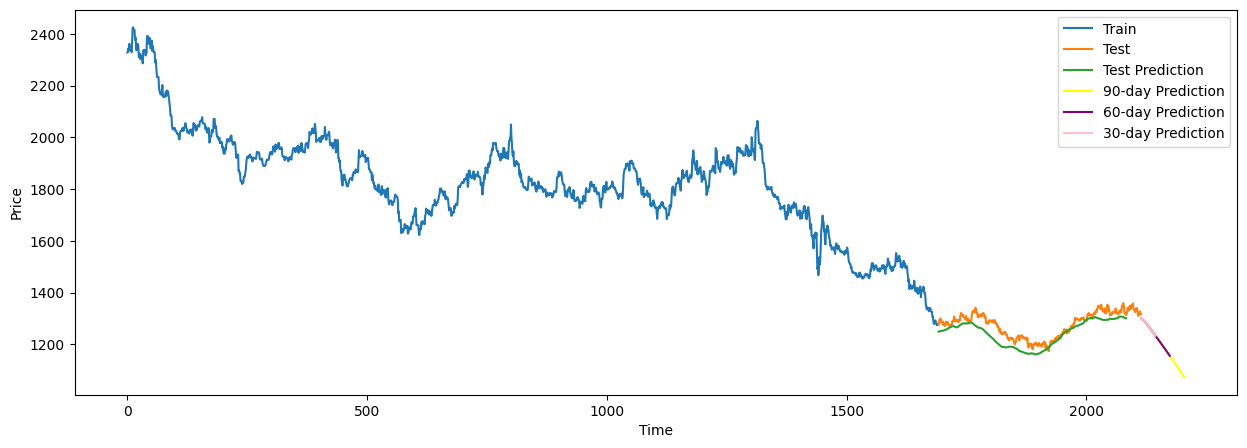

In [22]:
plt.figure(figsize=(15, 5))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, scaler.inverse_transform(train_data), label='Train')

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data), label='Test')

test_pred_index = pd.RangeIndex(start=train_size, stop=train_size+len(y_pred), step=1)
plt.plot(test_pred_index, y_pred, label='Test Prediction')

next_90days_pred_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+len(lst_output_90), step=1)
plt.plot(next_90days_pred_index, lst_output_90, color='yellow', label='90-day Prediction')

next_60days_pred_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+len(lst_output_60), step=1)
plt.plot(next_60days_pred_index, lst_output_60, color='purple', label='60-day Prediction')

next_30days_pred_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+len(lst_output), step=1)
plt.plot(next_30days_pred_index, lst_output, color='pink', label='30-day Prediction')

plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()